# Fashion MNIST: A Multi-Class Classification Problem
We will create a multi-class MLP network to solve a multi-class classification problem. Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset - a handwriting digit dataset often used as a "Hello World" dataset for machine learning. Fashion MNIST contains fashion item images, which turns out to be more challenging than MNIST.  

Fashion MNIST contains 60,000 training images and 10,000 test images, 28 x 28 pixels each, with 10 categories. 

<img src="w2-fashionMnist.png">


## 1. Load the dataset
Keras provides some utility functions to fetch and load some commonly used datasets, including Fashin MNIST. The `load_data()` method directly splits the training and test set. 

Since the class names are not included with the dataset, store them here to use later when plotting the images.

We will explore the format of the dataset, the data type of the input images, also display a few images to have a first impression of the dataset.

In [41]:
from keras.datasets import fashion_mnist # Pip install both keras and tensor flow in the venv
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_classes = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Inspect data
print(f" There are {X_train.shape[0]} images which are {X_train.shape[1]} x {X_train.shape[2]} pixels. These are for training.")
print(f" We also have {y_train.shape[0]} labels for each image.")
print(f" An exampe of a label for the first image is {y_train[0]} which corresponds to {class_names[y_train[0]]}")

print(f" There are {X_test.shape[0]} images which are {X_test.shape[1]} x {X_test.shape[2]} pixels. These are for testing.")

# Check that the labels are correct 
print(y_train.dtype, y_train.min(), y_train.max(), y_train.shape)




 There are 60000 images which are 28 x 28 pixels. These are for training.
 We also have 60000 labels for each image.
 An exampe of a label for the first image is 9 which corresponds to Ankle boot
 There are 10000 images which are 28 x 28 pixels. These are for testing.
uint8 0 9 (60000,)


## 2. Prepare the data
Since pixel values in an image are in the same range [0, 255], we don't need to standarize or normalize the input data as what we did for the Indian Diebetes dataset. The only thing we are suppose to do for this dataset is to scale the pixel values down to the [0,1] range by simply dividing them by 255.0 (this also converts them to floats). 

In [23]:
# For each row of data, 
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Verify this worked
print(f"After rescaling, an examlpe of training data X-axis pixes are: {X_train[5][0]}")


After rescaling, an examlpe of training data X-axis pixes are: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4263261e-17
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.1379167e-16
 1.2551667e-15 2.6814924e-15 2.4532804e-15 1.8827503e-15 1.7829074e-15
 2.0111196e-15 2.8383883e-15 2.0396460e-15 1.2836934e-16 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.4263261e-17 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]


## 3. Build your network
Similar to the previous network you have created, you first create a `sequential` model, then add `Dense` layers one by one. The only difference here is that you need add a `Flatten` layer before the first `Dense` layer. The `Flatten` layer is to convert the 2-D image (28 x 28) into a 1-D array (784 x 1). This layer does not have any parameters, as it is just there to do simple preprocessing.

For the output layer, its node number would be the class number, the activation function for a multi-class problem is typically `softmax`.

In [42]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Create a model
model = Sequential()

# 1st layer: FLATTEN the image. 784 nodes.
model.add(Flatten(input_shape=(28, 28)))

# 2nd layer: Dense + ReLU. 256 nodes. So here we have (784+1) x 256 weights to calculate between 1st and 2nd layer
model.add(Dense(300, activation='relu'))

# 3rd layer: Dense + ReLU. 128 nodes. So we have (256+1) x 128 weights to claculate between 2nd and 3rd layer
model.add(Dense(300, activation='relu'))

# Output layer. 10 nodes, 1 for each class. So we have (128+1) x 10 weights to calculate between 3rd and output layer
model.add(Dense(10, activation='softmax'))

# Bcause of the softmax the output is going to be something like 
# [0.02, 0.01, 0.85, 0.03, 0.01, 0.02, 0.01, 0.01, 0.02, 0.02]

model.summary()

/Users/george/first_neural_network/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile the model
The typical loss function for a multi-class problem is the multi-class cross-entropy loss function. In Keras, there are two options. One is to use the `sparse_categorical_crossentropy` loss with the original sparse labels (i.e., for each image, there is just one actual class index, from 0 to 9 in this case). The other is to use `categorical_crossentropy` loss if the actual output is a one-hot vector (e.g., [0, 0, 1, 0, ...., 0]). In this case, we will need to first convert the current sparse label (i.e., class index) to one-hot vecore labels by using `keras.utils.to_categorical()` method.

In [43]:
# Remember that in y_train, we have labels like y_train[0] =2. So with the sparse categorical cross entropy,
# Keras internally, will take the softmax output, and look at the probability of class 2 and it will compute the cross entropy loss. 

model.compile(
    loss = "sparse_categorical_crossentropy", 
    optimizer = 'adam', # This is not SGD, or Momentum, it increases learning rate when slope is reliable and slows it down when noisy. THIS IS ADAPTIVE LEARNING RATE
    metrics = ['accuracy'] # accuracy = (number of correct predictions) / (total predictions)
)

## 5. Train and validate the model
We use a validation set to moniter your model. We also draw the learning curve on the training and validation sets, to see how your model is learnt and how it generalises to new data, then try to adjust our model and add any regularization techniques accordingly till we are satisfied.

In [ ]:
# Firstly, lets create a checkpoint where we store the best model obtained during training.
# We watch validation accurace and save the model when it improves. 
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'fashion_mnist_best.h5', # Where to save the mode
    monitor='val_accuracy', # Which variable to measure
    save_best_only=True, # Only save when the variable improves
    mode='max', # Success is when the metric increases
    verbose=1 # Display messages 
)

callbacks = [checkpoint] # Store each checkpoint in a list

# Now we train the model

print('Starting training...')
# train the model, store the results for plotting
history = model.fit(
    X_train, y_train,
    validation_split=0.2,   # 20% of training used as validation
    epochs=20, # Epoch  = one full pass through the training dataset. `too few = underfitting, too many = overfitting`
    batch_size=128, # Insead of going throuigh 60000 * 0.8 (remmebr train split) images, we group them in groups of 128 so for 1 epoch, the model will update its weights 60000*0.8/128 times
    callbacks=callbacks,
    verbose = "auto"
)

Starting training...
Epoch 1/20
347/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6844 - loss: 14.5322
Epoch 1: val_accuracy improved from None to 0.76925, saving model to fashion_mnist_best.h5



Epoch 1: finished saving model to fashion_mnist_best.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7504 - loss: 4.8339 - val_accuracy: 0.7692 - val_loss: 1.4607
Epoch 2/20
366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.9251
Epoch 2: val_accuracy improved from 0.76925 to 0.79775, saving model to fashion_mnist_best.h5



Epoch 2: finished saving model to fashion_mnist_best.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8044 - loss: 0.7928 - val_accuracy: 0.7977 - val_loss: 0.7503
Epoch 3/20
356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8241 - loss: 0.6053
Epoch 3: val_accuracy did not improve from 0.79775
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.5756 - val_accuracy: 0.7822 - val_loss: 0.7547
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.5084
Epoch 4: val_accuracy improved from 0.79775 to 0.84167, saving model to fashion_mnist_best.h5



Epoch 4: finished saving model to fashion_mnist_best.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.4917 - val_accuracy: 0.8417 - val_loss: 0.5083
Epoch 5/20
351/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.4329
Epoch 5: val_accuracy did not improve from 0.84167
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8511 - loss: 0.4511 - val_accuracy: 0.8062 - val_loss: 0.6220
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.4303
Epoch 6: val_accuracy did not improve from 0.84167
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.4315 - val_accuracy: 0.8382 - val_loss: 0.5387
Epoch 7/20
345/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.4134
Epoch 7: val_accuracy did not improve from 0.84167
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 0.4351 - val_accuracy: 0.8294 - val_loss: 0.5365
Epoch 8/20
345/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 


Epoch 9: finished saving model to fashion_mnist_best.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8636 - loss: 0.4033 - val_accuracy: 0.8499 - val_loss: 0.4858
Epoch 10/20
358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3789
Epoch 10: val_accuracy did not improve from 0.84992
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3862 - val_accuracy: 0.8381 - val_loss: 0.5297
Epoch 11/20
356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3682
Epoch 11: val_accuracy improved from 0.84992 to 0.85967, saving model to fashion_mnist_best.h5



Epoch 11: finished saving model to fashion_mnist_best.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8693 - loss: 0.3719 - val_accuracy: 0.8597 - val_loss: 0.4992
Epoch 12/20
362/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.3595
Epoch 12: val_accuracy did not improve from 0.85967
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8711 - loss: 0.3603 - val_accuracy: 0.8393 - val_loss: 0.4659
Epoch 13/20
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.3508
Epoch 13: val_accuracy did not improve from 0.85967
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.3641 - val_accuracy: 0.8347 - val_loss: 0.4770
Epoch 14/20
358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3534
Epoch 14: val_accuracy did not improve from 0.85967
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.3555 - val_accuracy: 0.8553 - val_loss: 0.4297
Epoch 15/20
356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac


Epoch 17: finished saving model to fashion_mnist_best.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 0.3356 - val_accuracy: 0.8697 - val_loss: 0.4070
Epoch 18/20
362/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8895 - loss: 0.3066
Epoch 18: val_accuracy did not improve from 0.86967
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8859 - loss: 0.3147 - val_accuracy: 0.8564 - val_loss: 0.4328
Epoch 19/20
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8823 - loss: 0.3190
Epoch 19: val_accuracy did not improve from 0.86967
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8849 - loss: 0.3153 - val_accuracy: 0.8620 - val_loss: 0.4332
Epoch 20/20
359/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8906 - loss: 0.3016
Epoch 20: val_accuracy improved from 0.86967 to 0.87083, saving model to fashion_mnist_best.h5



Epoch 20: finished saving model to fashion_mnist_best.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8913 - loss: 0.3005 - val_accuracy: 0.8708 - val_loss: 0.3878


## 6. Create the accuracy plots

Accuracy plots show how often the model predicts the correct class over time. The training accuracy indicates how well the model fits the training data, while the validation accuracy shows how well the model generalises to unseen data. Comparing the two helps identify underfitting (both accuracies low) or overfitting (training accuracy high but validation accuracy significantly lower).

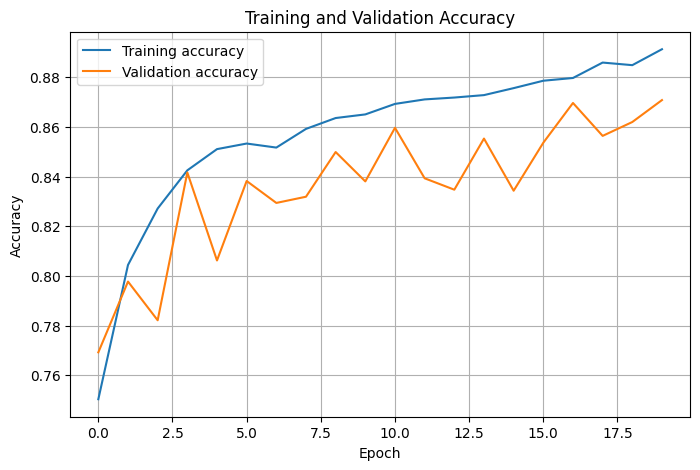

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))

plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

plt.show()

## 7. Create the loss plots

Loss plots show how wrong the model’s predictions are and how confident those predictions are. Training loss reflects how well the model is learning the training data, while validation loss indicates how stable and reliable the model is on unseen data. Diverging loss curves—where training loss decreases but validation loss increases—are a strong sign of overfitting.

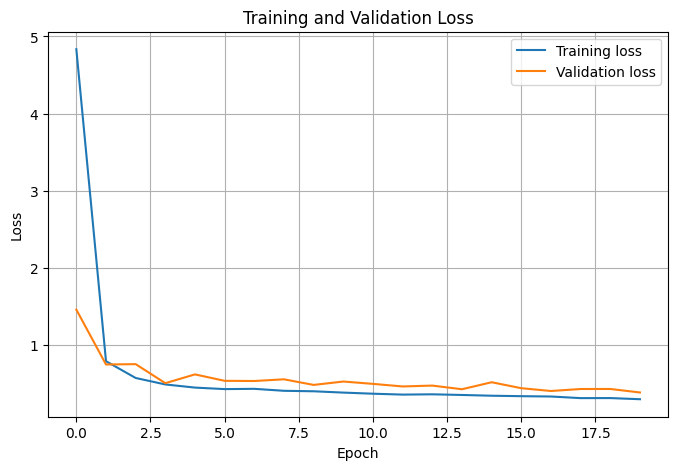

In [46]:
plt.figure(figsize=(8, 5))

plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)

plt.show()

## 8. Evaluate the model
First evaluate our model on the test set to report the accuracy on the test set. Then use the `model`'s `predict()` method to make predictions on new instances. Display a few images and compare their predicting classes with their actual classes.

In [47]:
# Evalute the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Make predictions on new data
y_pred_prob = model.predict(X_test)

Test accuracy: 0.8643
Test loss: 0.4235
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
